In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers 
import matplotlib.pyplot as plt
import pathlib

# Parameters
IMG_SIZE = 128
BATCH_SIZE = 16
channel = 3
epoch = 40
# Dataset path in Kaggle
DATASET_PATH = pathlib.Path("/kaggle/input/plant-village/PlantVillage")


dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    labels="inferred",
    label_mode="int",
    shuffle=True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_names=["Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight","Tomato_Leaf_Mold","Tomato_Septoria_leaf_spot","Tomato_Spider_mites_Two_spotted_spider_mite","Tomato__Target_Spot","Tomato__Tomato_YellowLeaf__Curl_Virus","Tomato__Tomato_mosaic_virus","Tomato_healthy"]
)

2025-09-29 14:24:05.932538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759155846.126784      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759155846.193680      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 16011 files belonging to 10 classes.


I0000 00:00:1759155870.460332      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [2]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

Image Batch Shape:  (16, 128, 128, 3)
[2 9 7 2 3 9 4 4 3 7 5 7 3 4 4 1]


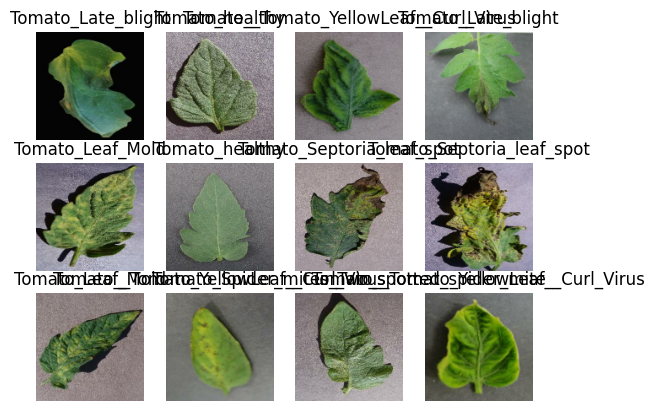

In [3]:
for image_batch,labels_batch in dataset.take(1):
    print("Image Batch Shape: ",image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [4]:
train_size = 0.8
len(dataset)*train_size
train_ds = dataset.take(54)
len(train_ds)

54

In [5]:
#dividing data set into three part 80% for training 10% for testing 10% for validation

test_ds = dataset.skip(54)
len(test_ds)
val_size = 0.1
len(dataset)*val_size
val_ds = test_ds.take(6)
len(val_ds)
test_ds = test_ds.skip(6)
len(test_ds)


941

In [6]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split = 0.1 ,val_split=0.1,shuffle=True,shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)    
    return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(val_ds)

100

In [7]:
len(train_ds)

800

In [8]:
len(test_ds)

101

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
for image_batch,labels_batch in dataset.take(1):
    print("Image Batch Shape: ",image_batch.shape)
    print(image_batch[0].numpy()/255)

Image Batch Shape:  (16, 128, 128, 3)
[[[0.70490193 0.71666664 0.78333336]
  [0.7029412  0.7147059  0.78137255]
  [0.6960784  0.7078431  0.7745098 ]
  ...
  [0.76960784 0.7617647  0.8127451 ]
  [0.76960784 0.7617647  0.8127451 ]
  [0.7647059  0.75686276 0.80784315]]

 [[0.6931372  0.70490193 0.77156866]
  [0.6852941  0.6970588  0.7637255 ]
  [0.6901961  0.7019608  0.76862746]
  ...
  [0.78137255 0.7735294  0.8245098 ]
  [0.7607843  0.7529412  0.8039216 ]
  [0.7745098  0.76666665 0.81764704]]

 [[0.70098037 0.7127451  0.7794118 ]
  [0.69215685 0.70392156 0.7705882 ]
  [0.6911765  0.7029412  0.76960784]
  ...
  [0.75490195 0.7470588  0.7980392 ]
  [0.7656863  0.75784314 0.8088235 ]
  [0.7735294  0.7656863  0.81666666]]

 ...

 [[0.3882353  0.35686275 0.4392157 ]
  [0.37843138 0.34705883 0.42941177]
  [0.3764706  0.34509805 0.42745098]
  ...
  [0.43823528 0.40686274 0.48921567]
  [0.37745097 0.34607843 0.42843136]
  [0.35196078 0.32058823 0.40294117]]

 [[0.39215687 0.36078432 0.44313726]

In [10]:
rescaling_and_resizing = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
])

In [12]:

model = models.Sequential([
    rescaling_and_resizing,
    data_augmentation,
    
   # Block 1
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    # Block 2
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    
    #Block 4
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
   
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [14]:

history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    epochs=epoch
)

Epoch 1/40


I0000 00:00:1759155901.620976      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


800/800 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.2694 - loss: 2.0139 - val_accuracy: 0.3944 - val_loss: 1.6536
Epoch 2/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4696 - loss: 1.4997 - val_accuracy: 0.5200 - val_loss: 1.3950
Epoch 3/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6348 - loss: 1.0199 - val_accuracy: 0.7075 - val_loss: 0.8404
Epoch 4/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7196 - loss: 0.7852 - val_accuracy: 0.7056 - val_loss: 0.8454
Epoch 5/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7834 - loss: 0.6303 - val_accuracy: 0.7394 - val_loss: 0.7176
Epoch 6/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8128 - loss: 0.5218 - val_accuracy: 0.7275 - val_loss: 0.8469
Epoch 7/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8386 - loss: 0.4623 - val_accuracy: 0.8394 - val_loss: 0.4535
Epoch 8/40
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8611 - loss: 0.3880 - val_accurac

In [15]:
len(test_ds)

101

In [16]:
score = model.evaluate(test_ds)

101/101 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0494


In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [18]:
history.history['accuracy']

[0.31606096029281616,
 0.5177022218704224,
 0.6537709832191467,
 0.734740138053894,
 0.786948025226593,
 0.8187573552131653,
 0.8440015912055969,
 0.8615865707397461,
 0.8800312876701355,
 0.8889409899711609,
 0.8898788690567017,
 0.9037123918533325,
 0.9141852259635925,
 0.9186400771141052,
 0.9221571087837219,
 0.9315357804298401,
 0.9327080845832825,
 0.9342712163925171,
 0.9414615035057068,
 0.9352872371673584,
 0.9433372616767883,
 0.9456037282943726,
 0.9494333863258362,
 0.945838212966919,
 0.9534974694252014,
 0.9533411264419556,
 0.955998420715332,
 0.9572489261627197,
 0.961781919002533,
 0.9556857943534851,
 0.963579535484314,
 0.961313009262085,
 0.9623290300369263,
 0.9600625038146973,
 0.9666275978088379,
 0.9675654768943787,
 0.9652989506721497,
 0.969050407409668,
 0.9669402241706848,
 0.9657678604125977]

In [19]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

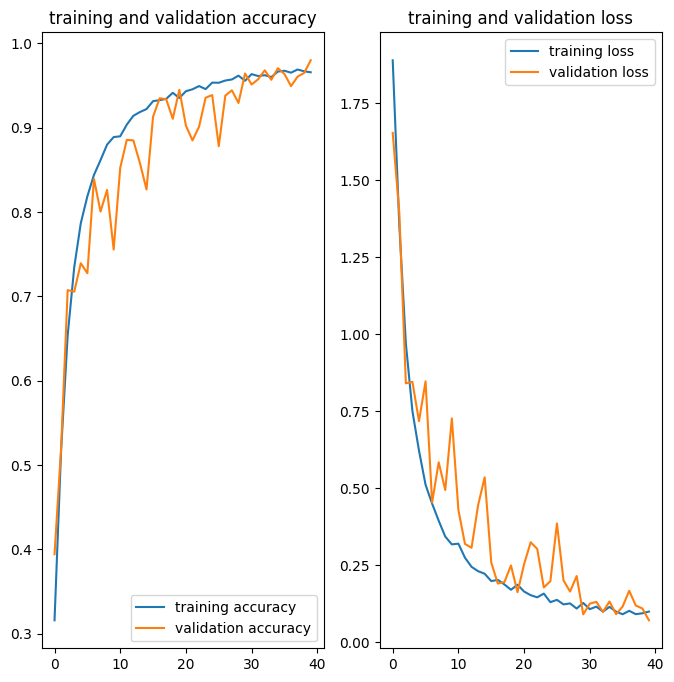

In [20]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epoch),acc,label='training accuracy')
plt.plot(range(epoch),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epoch),loss,label='training loss')
plt.plot(range(epoch),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()



first image to print
actual label:  Tomato_healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
predict label:  Tomato_healthy


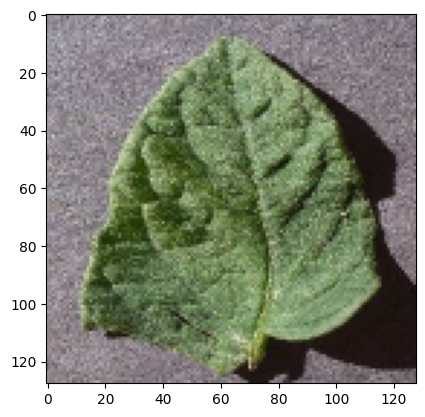

In [21]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype('uint8')
    print('first image to print')
    plt.imshow(first_img)
    print('actual label: ',class_names[labels_batch[0].numpy()])
    
    batch_predict = model.predict(image_batch)
    print('predict label: ',class_names[ np.argmax(batch_predict[0])])
   
   

In [22]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image_batch[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


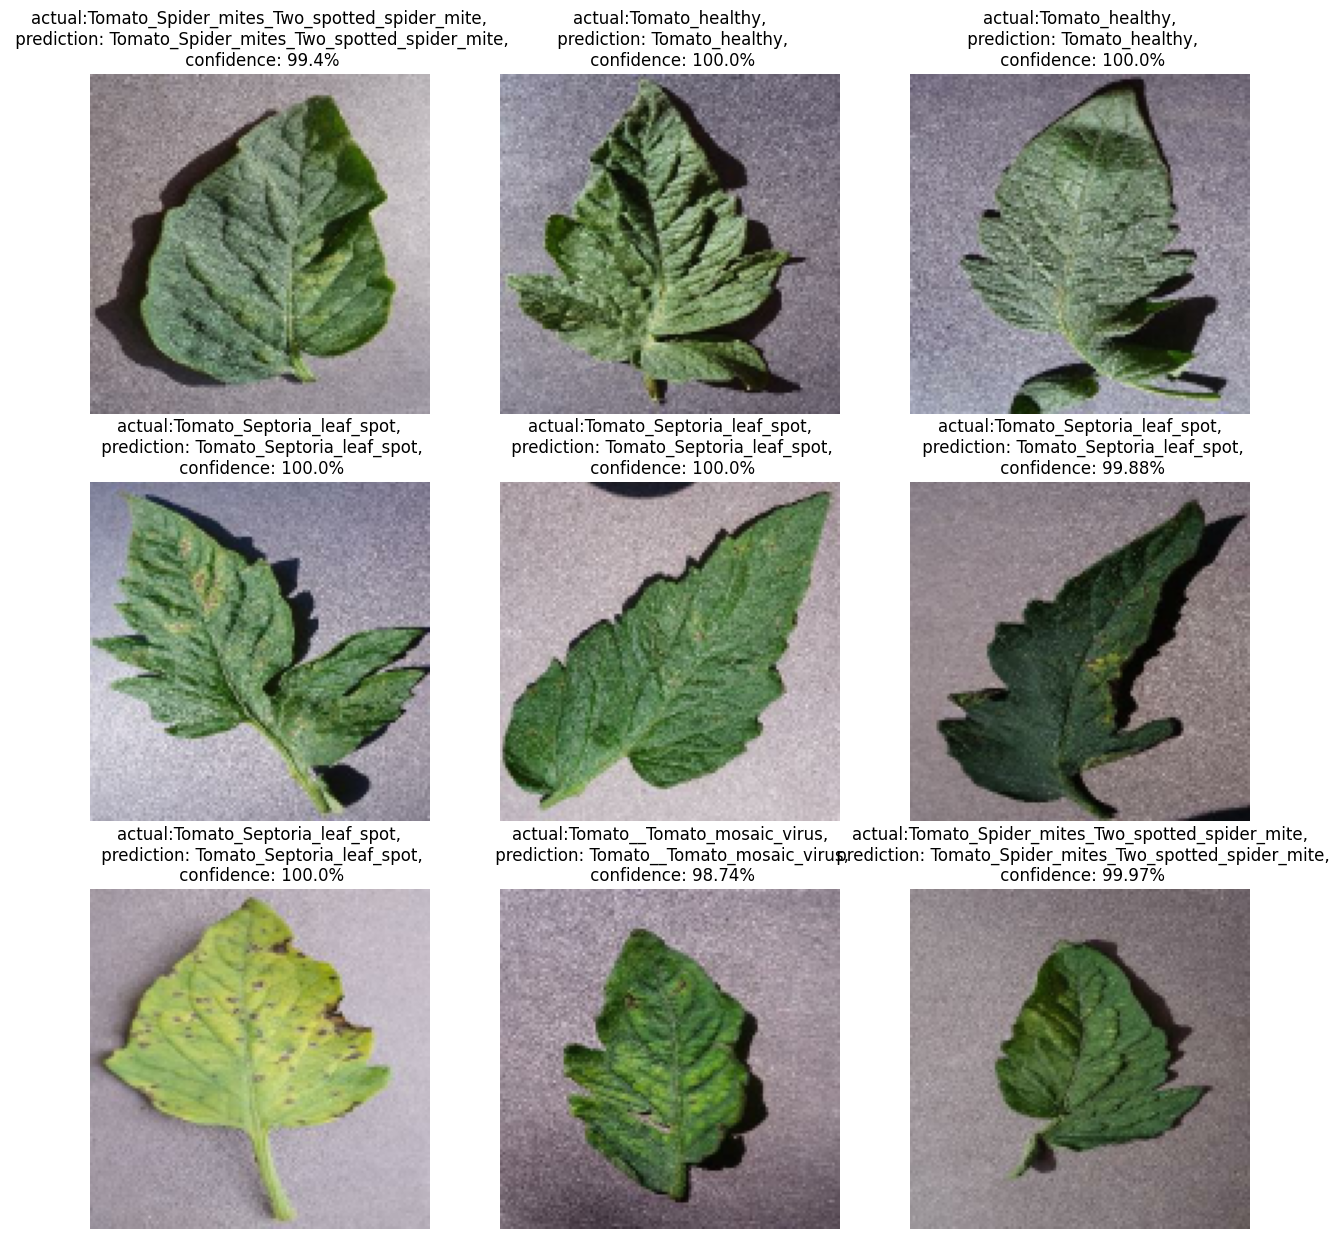

In [23]:
plt.figure(figsize=(15,15))
for image_batch,labels_batch in test_ds.take(1):
    for i in range(9):
      img = image_batch[i].numpy().astype('uint8')
      ax = plt.subplot(3,3,i+1)
      plt.imshow(img)
     
      predicted_class,confidence = predict(model,image_batch[i].numpy())
      actual_class = class_names[labels_batch[i]]
      plt.title(f"actual:{actual_class},\n prediction: {predicted_class},\n confidence: {confidence}%")
      plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

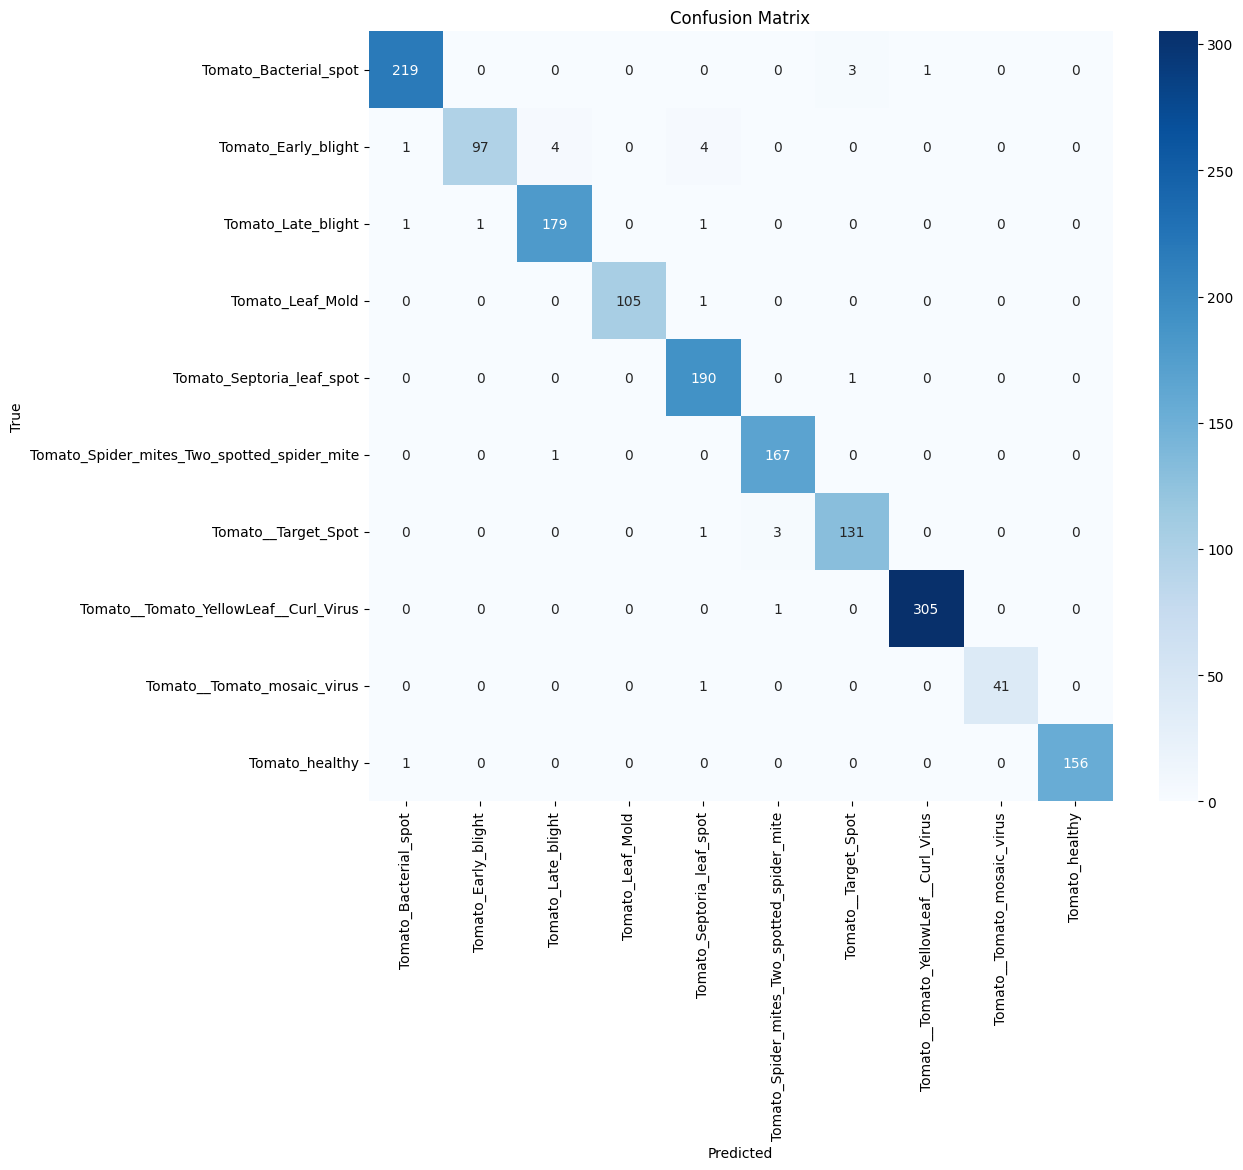

In [24]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define class names manually
class_names = ["Tomato_Bacterial_spot", "Tomato_Early_blight", "Tomato_Late_blight",
               "Tomato_Leaf_Mold", "Tomato_Septoria_leaf_spot", 
               "Tomato_Spider_mites_Two_spotted_spider_mite", "Tomato__Target_Spot",
               "Tomato__Tomato_YellowLeaf__Curl_Virus", "Tomato__Tomato_mosaic_virus",
               "Tomato_healthy"]

# Collect all true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())  # convert to numpy
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def compute_saliency_map(model, img_array, class_index=None):
    """
    Computes the saliency map of the model's prediction for an input image.

    Parameters:
    -----------
    model : tf.keras.Model
        A trained model (must be built).
    img_array : Tensor of shape (1, H, W, C)
        Input image batch (preprocessed).
    class_index : int or None
        Class index to compute saliency for. If None, uses predicted class.

    Returns:
    --------
    saliency : np.ndarray of shape (H, W)
        The saliency map normalized to [0, 1].
    """
    img_array = tf.cast(img_array, tf.float32)
    
    # Watch input image
    img_array = tf.Variable(img_array)

    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        score = predictions[:, class_index]

    # Compute gradients of the score w.r.t. input image
    grads = tape.gradient(score, img_array)

    # Take maximum gradient across color channels
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]

    # Normalize to [0, 1]
    saliency = saliency / (tf.reduce_max(saliency) + 1e-10)
    return saliency.numpy()

def show_saliency_on_image(saliency, image, alpha=0.5):
    """
    Overlay saliency map on image.
    Automatically rescales image for display if needed.
    """
    # Convert [0,1] or [-1,1] to [0,255] for display
    if image.max() <= 1.0:
        display_img = (image * 255).astype(np.uint8)
    elif image.min() < 0:
        display_img = ((image + 1) * 127.5).astype(np.uint8)
    else:
        display_img = image.astype(np.uint8)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(display_img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(saliency, cmap='hot')
    plt.title("Saliency Map")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(display_img)
    plt.imshow(saliency, cmap='hot', alpha=alpha)
    plt.title("Saliency Overlay")
    plt.axis("off")

    plt.tight_layout()
    plt.show()



I0000 00:00:1759156449.072622      19 cuda_solvers.cc:178] Creating GpuSolver handles for stream 0x219c5c60


Predicted: Tomato__Tomato_YellowLeaf__Curl_Virus (100.00%) | True: Tomato__Tomato_YellowLeaf__Curl_Virus


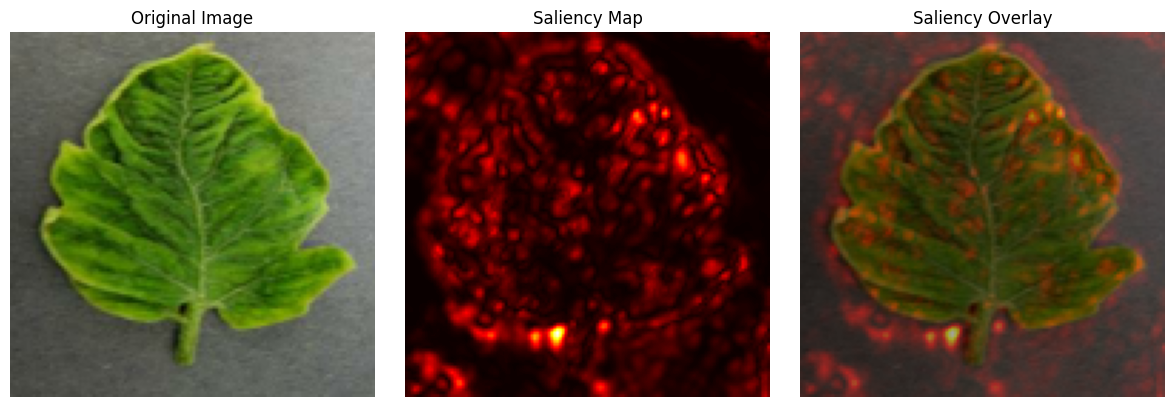

In [26]:
# Grab one sample from your test dataset
for images, labels in test_ds.take(1):
    img = images[0].numpy()
    img_input = tf.expand_dims(img, axis=0)  # shape (1, H, W, C)
    true_label = class_names[labels[0].numpy()]

    # Force model to build (in case it isn't)
    _ = model(img_input)

    # Predict
    preds = model.predict(img_input, verbose=0)
    pred_index = np.argmax(preds[0])
    pred_label = class_names[pred_index]
    confidence = preds[0][pred_index]

    # Compute saliency map
    saliency = compute_saliency_map(model, img_input, class_index=pred_index)

    # Show results
    print(f"Predicted: {pred_label} ({confidence:.2%}) | True: {true_label}")
    show_saliency_on_image(saliency, img)
    break


In [27]:
model.save("/kaggle/working/my_model.keras")
